In [1]:
import numpy as np
import pandas as pd

In [ ]:
# features from rfecv
features1 = ['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_words', 'q2_words',
       'q1_characters', 'q2_characters', 'q1_u_words', 'q2_u_words',
       'q2_u_words_wo_sw', 'total_u_words_wo_sw', 'word_common', 'word_total',
       'word_share', 'freq_sum', 'freq_diff', 'chebyshev', 'braycurtis',
       'cosine', 'correlation', 'canberra', 'cityblock', 'euclidean',
       'minkowski', 'squared_euclidean', 'word_mover_distance', 'skew_q1',
       'skew_q2', 'kurtosis_q1', 'kurtosis_q2', 'cwc_min', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'abs_len_diff',
       'mean_len', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio', 'longest_substr_ratio', 'is_duplicate']

In [ ]:
len(features1)

In [ ]:
df1 = pd.read_csv('undersampled_train_dataset.csv', usecols=features1)

In [ ]:
df1.head()

In [ ]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(how="any", inplace=True)

In [ ]:
dataset1 = df1.values

In [ ]:
X1 = dataset1[:, :-1]
Y1 = dataset1[:, -1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_valid1, Y_train1, Y_valid1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(X_train1)

X_train_std1 = scaler1.transform(X_train1)
Y_train1 = Y_train1.ravel()

X_valid_std1 = scaler1.transform(X_valid1)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

In [ ]:
clf1 = LogisticRegression(solver='sag', max_iter=3000, tol=5e-4)

param_range = np.logspace(-3, 3, 7, endpoint=True)
param_name="C"
cv = 5

def cross_validate(scoring):
    train_scores, valid_scores = validation_curve(
        clf1, X_train_std1, Y_train1, param_name=param_name, param_range=param_range,
        scoring=scoring,
        cv=cv,
        n_jobs=1,
        error_score="raise")
    
    print(train_scores)
    print(valid_scores)
    plot(scoring, train_scores, valid_scores)

In [ ]:
import matplotlib.pyplot as plt

def plot(scoring, train_scores, valid_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    
    print(train_scores_mean)
    
    plt.title("Validation Curve with Logistic Regression")
    plt.xlabel("C (Inverse of regularization strength)")
    plt.ylabel(scoring)
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(
        param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.semilogx(
        param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.show()

In [ ]:
X_train_std1.shape

In [ ]:
cross_validate('precision')

In [5]:
clf1 = LogisticRegression(solver='sag', max_iter=3000, tol=5e-4, C=1.0)

In [6]:
clf1.fit(X_train_std1, Y_train1)
y_pred1 = clf1.predict(X_valid_std1)

NameError: name 'X_train_std1' is not defined

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_valid1, y_pred1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_valid1, y_pred1).ravel()
print(confusion_matrix(Y_valid1, y_pred1))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_valid1, y_pred1))

In [ ]:
df_test1 = pd.read_csv('undersampled_test_dataset.csv', usecols=features1)
df_test1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test1.dropna(how="any", inplace=True)

In [ ]:
dataset_test1 = df_test1.values
X_test1 = dataset_test1[:, :-1]
Y_test1 = dataset_test1[:, -1:]

In [ ]:
X_test_std1 = scaler.transform(X_test1)
y_test_pred1 = clf.predict(X_test_std1)

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test1, y_test_pred1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test1, y_test_pred1).ravel()
print(confusion_matrix(Y_test1, y_test_pred1))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_test1, y_test_pred1))

In [55]:
# features from rfe (features = 20)
features2 = ['freq_qid1', 'freq_qid2', 'word_share', 'freq_sum', 'freq_diff',
       'braycurtis', 'cosine', 'correlation', 'euclidean', 'squared_euclidean',
       'skew_q1', 'kurtosis_q1', 'cwc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'abs_len_diff', 'token_sort_ratio', 'token_set_ratio',
       'longest_substr_ratio', 'is_duplicate']

In [56]:
df2 = pd.read_csv('undersampled_train_dataset.csv', usecols=features2)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(how="any", inplace=True)

In [57]:
dataset2 = df2.values
X2 = dataset2[:, :-1]
Y2 = dataset2[:, -1:]

from sklearn.model_selection import train_test_split
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X_train2)

X_train_std2 = scaler2.transform(X_train2)
Y_train2 = Y_train2.ravel()

X_valid_std2 = scaler2.transform(X_valid2)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

In [60]:
clf2 = LogisticRegression(solver='sag', max_iter=3000, tol=5e-4, C=1.0)
clf2.fit(X_train_std2, Y_train2)
y_pred2 = clf2.predict(X_valid_std2)

[[ 1.46292693 -1.51420072  1.19767103 -1.18482925  1.92544194 -3.19215787
   0.47738775  0.64152     0.96177806 -0.39245821  0.59104525 -1.94021797
  -0.62213164  0.41326223  0.31916579 -0.60634532]]


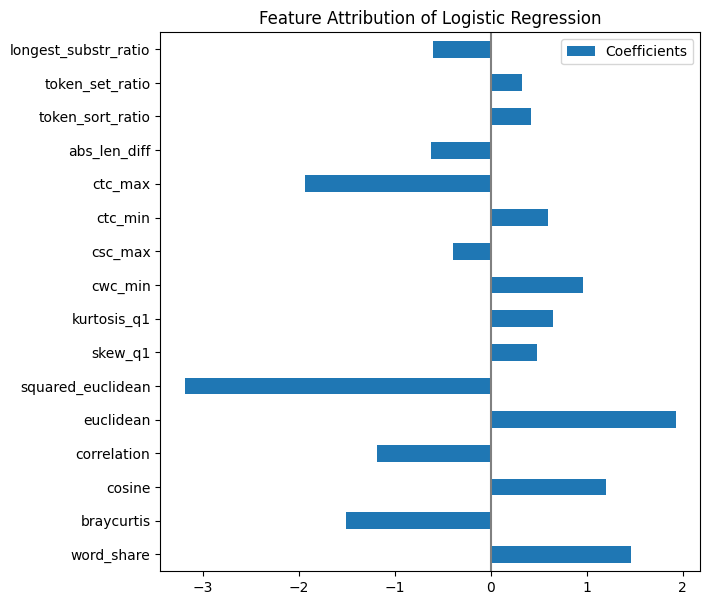

In [61]:
import matplotlib.pyplot as plt

print(clf2.coef_)

coefs = pd.DataFrame(
   clf2.coef_[0],
   columns=['Coefficients'], index=np.array(features2[:-1])
);

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Attribution of Logistic Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

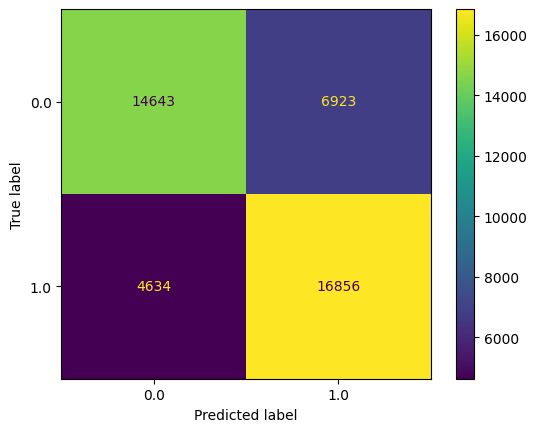

In [63]:
ConfusionMatrixDisplay.from_predictions(Y_valid2, y_pred2)
plt.show()

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_valid2, y_pred2).ravel()
print(confusion_matrix(Y_valid2, y_pred2))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_valid2, y_pred2))

[[14643  6923]
 [ 4634 16856]]
TN: 14643, FP: 6923, FN: 4634, TP: 16856
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72     21566
         1.0       0.71      0.78      0.74     21490

    accuracy                           0.73     43056
   macro avg       0.73      0.73      0.73     43056
weighted avg       0.73      0.73      0.73     43056



In [65]:
df_test2 = pd.read_csv('undersampled_test_dataset.csv', usecols=features2)
df_test2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test2.dropna(how="any", inplace=True)

In [66]:
dataset_test2 = df_test2.values
X_test2 = dataset_test2[:, :-1]
Y_test2 = dataset_test2[:, -1:]

In [67]:
X_test_std2 = scaler2.transform(X_test2)
y_test_pred2 = clf2.predict(X_test_std2)

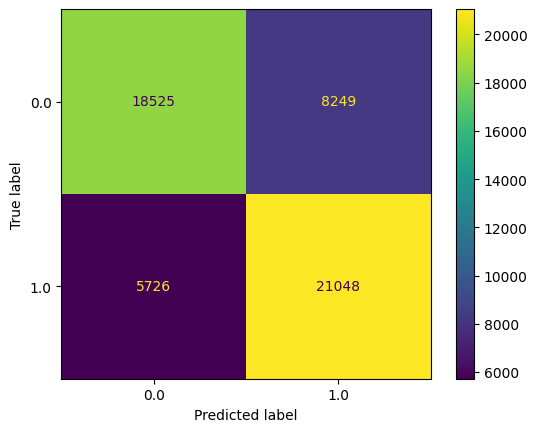

In [68]:
ConfusionMatrixDisplay.from_predictions(Y_test2, y_test_pred2)
plt.show()

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test2, y_test_pred2).ravel()
print(confusion_matrix(Y_test2, y_test_pred2))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_test2, y_test_pred2))

[[18525  8249]
 [ 5726 21048]]
TN: 18525, FP: 8249, FN: 5726, TP: 21048
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73     26774
         1.0       0.72      0.79      0.75     26774

    accuracy                           0.74     53548
   macro avg       0.74      0.74      0.74     53548
weighted avg       0.74      0.74      0.74     53548

